<a href="https://colab.research.google.com/github/zeel2321-lit/Stock_Price_Prediction_/blob/main/LHC_Finding_duplicate__question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/dataset/postLinks.csv')

In [ ]:
df_train


,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
0,0,19,2010-04-26T02:59:48.130,109,32412,1
1,1,37,2010-04-26T02:59:48.600,1970,617600,1
2,2,42,2010-04-26T02:59:48.647,2154,2451138,1
3,3,48,2010-04-26T02:59:48.740,2483,496096,1
4,4,52,2010-04-26T02:59:48.757,2572,209329,1
...,...,...,...,...,...,...
5292619,5292619,1624278139,2018-09-02T08:09:41.520,52133002,31486547,1
5292620,5292620,1624278147,2018-09-02T08:10:50.820,52134991,5500805,1
5292621,5292621,1624278315,2018-09-02T08:14:26.470,52135049,30461565,1
5292622,5292622,1624278337,2018-09-02T08:15:36.387,52135007,1761051,1


Id primary key

CreationDate when the link was created

PostId id of source post

RelatedPostId id of target/related post

LinkTypeId type of link

1 = Linked (PostId contains a link to RelatedPostId)

3 = Duplicate (PostId is a duplicate of RelatedPostId)


In [ ]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id


In [ ]:
print("(1). Total number of questation pairs for training:- {}". format(len(df_train)))
print("(2). Questation pairs are related (link_type_id==1) in percentage:- {}%".format(round(df_train['link_type_id'].mean()*100,2)-100))
print("(3). Questation pairs are duplicate (link_type_id==3) in percentage:- {}%".format(round(df_train['link_type_id'].mean()*100,2)))

(1). Total number of questation pairs for training:- 5292624
(2). Questation pairs are related (link_type_id==1) in percentage:- 25.78%
(3). Questation pairs are duplicate (link_type_id==3) in percentage:- 125.78%


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/dataset/posts_short.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
data

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,community_owned_date
0,0,4,1,7,-999,2008-07-31T21:42:52.667,573,37080,8,<c#><floating-point><type-conversion><double><...,13,1,41,2012-10-31T16:42:47.213
1,1,6,1,31,-999,2008-07-31T22:08:08.620,256,16306,9,<html><css><css3><internet-explorer-7>,5,0,10,NaN
2,2,9,1,1404,-999,2008-07-31T23:40:59.743,1743,480476,1,<c#><.net><datetime>,64,7,399,2011-08-16T19:40:43.080
3,3,11,1,1248,-999,2008-07-31T23:55:37.967,1348,136033,1,<c#><datetime><time><datediff><relative-time-s...,35,3,529,2009-09-04T13:15:59.820
4,4,13,1,-999,-999,2008-08-01T00:42:38.903,539,157009,9,<javascript><html><browser><timezone><timezone...,25,6,137,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676199,676199,52133457,1,-999,-999,2018-09-02T02:10:04.210,0,14,4101319,<python><import>,0,0,0,NaN
676200,676200,52133674,1,-999,-999,2018-09-02T03:08:51.103,-3,16,9815281,<java><firebase><android-studio>,0,2,0,NaN
676201,676201,52133700,1,-999,-999,2018-09-02T03:15:42.997,0,23,4044009,<c>,0,1,0,NaN
676202,676202,52133880,1,-999,-999,2018-09-02T04:04:31.570,0,15,10271692,<angularjs><node.js><ajax>,1,1,0,NaN


1. Determine the Number of Tags Per Question


In [ ]:
tag_short=data.values[:,9]
tagshort2=list()
tags=list()
for i in range(20):
  x=tag_short[i].split("<")
  s="".join(x)
  x= s.split(">")
  x.pop()
  tagshort2.append(x)
  tags.append(len(x))
  print(len(x))
  print(x)

5
['c#', 'floating-point', 'type-conversion', 'double', 'decimal']
4
['html', 'css', 'css3', 'internet-explorer-7']
3
['c#', '.net', 'datetime']
5
['c#', 'datetime', 'time', 'datediff', 'relative-time-span']
5
['javascript', 'html', 'browser', 'timezone', 'timezoneoffset']
2
['.net', 'math']
4
['mysql', 'database', 'binary-data', 'data-storage']
3
['mysql', 'database', 'triggers']
4
['sql', 'sql-server', 'datatable', 'rdbms']
4
['php', 'plugins', 'architecture', 'hook']
4
['html', 'form-submit', 'html-form', 'submit-button']
3
['c#', 'linq', '.net-3.5']
5
['linux', 'winapi', 'visual-c++', 'unix', 'timer']
4
['svn', 'tortoisesvn', 'branch', 'branching-and-merging']
4
['.net', 'performance', 'memory-leaks', 'com-interop']
4
['java', 'xml', 'csv', 'data-conversion']
4
['java', 'php', 'oop', 'theory']
5
['mysql', 'sql-server', 'csv', 'sql-server-2005', 'bcp']
4
['sql-server', 'database', 'svn', 'version-control']
4
['algorithm', 'language-agnostic', 'colors', 'color-space']


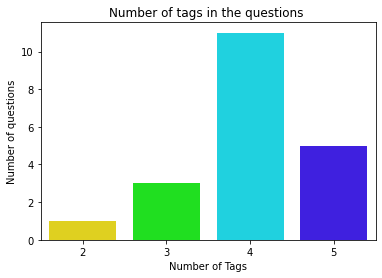

In [ ]:

# import necessary packages
import matplotlib.pyplot as plt

sns.countplot(tags, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

2. Determine the Total Number of Unique Tags

In [ ]:
print(tags)
print(tagshort2)

[5, 4, 3, 5, 5, 2, 4, 3, 4, 4, 4, 3, 5, 4, 4, 4, 4, 5, 4, 4]
[['c#', 'floating-point', 'type-conversion', 'double', 'decimal'], ['html', 'css', 'css3', 'internet-explorer-7'], ['c#', '.net', 'datetime'], ['c#', 'datetime', 'time', 'datediff', 'relative-time-span'], ['javascript', 'html', 'browser', 'timezone', 'timezoneoffset'], ['.net', 'math'], ['mysql', 'database', 'binary-data', 'data-storage'], ['mysql', 'database', 'triggers'], ['sql', 'sql-server', 'datatable', 'rdbms'], ['php', 'plugins', 'architecture', 'hook'], ['html', 'form-submit', 'html-form', 'submit-button'], ['c#', 'linq', '.net-3.5'], ['linux', 'winapi', 'visual-c++', 'unix', 'timer'], ['svn', 'tortoisesvn', 'branch', 'branching-and-merging'], ['.net', 'performance', 'memory-leaks', 'com-interop'], ['java', 'xml', 'csv', 'data-conversion'], ['java', 'php', 'oop', 'theory'], ['mysql', 'sql-server', 'csv', 'sql-server-2005', 'bcp'], ['sql-server', 'database', 'svn', 'version-control'], ['algorithm', 'language-agnostic',

In [170]:
l = []

for k in range(len(tagshort2)):
  for i in tagshort2[k]:
    l.append(i)

In [171]:
# initializing the list
random_list = l
frequency = {}

# iterating over the list
for item in random_list:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
print(frequency)

{'c#': 4, 'floating-point': 1, 'type-conversion': 1, 'double': 1, 'decimal': 1, 'html': 3, 'css': 1, 'css3': 1, 'internet-explorer-7': 1, '.net': 3, 'datetime': 2, 'time': 1, 'datediff': 1, 'relative-time-span': 1, 'javascript': 1, 'browser': 1, 'timezone': 1, 'timezoneoffset': 1, 'math': 1, 'mysql': 3, 'database': 3, 'binary-data': 1, 'data-storage': 1, 'triggers': 1, 'sql': 1, 'sql-server': 3, 'datatable': 1, 'rdbms': 1, 'php': 2, 'plugins': 1, 'architecture': 1, 'hook': 1, 'form-submit': 1, 'html-form': 1, 'submit-button': 1, 'linq': 1, '.net-3.5': 1, 'linux': 1, 'winapi': 1, 'visual-c++': 1, 'unix': 1, 'timer': 1, 'svn': 2, 'tortoisesvn': 1, 'branch': 1, 'branching-and-merging': 1, 'performance': 1, 'memory-leaks': 1, 'com-interop': 1, 'java': 2, 'xml': 1, 'csv': 2, 'data-conversion': 1, 'oop': 1, 'theory': 1, 'sql-server-2005': 1, 'bcp': 1, 'version-control': 1, 'algorithm': 1, 'language-agnostic': 1, 'colors': 1, 'color-space': 1}


In [165]:
number_of_unique_tags = len(set(l))
number_of_unique_tags

62

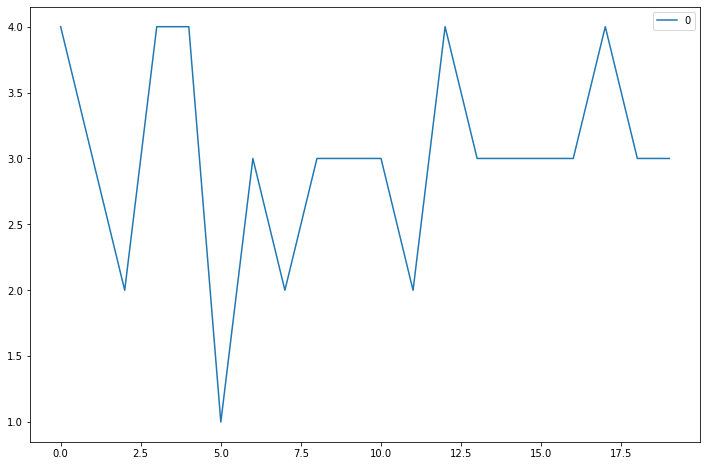

In [153]:
data = pd.DataFrame(l)
data.plot(figsize=(12,8))

Q 3 Determine the top-25 Tags appearing frequently

In [172]:
k = Counter(frequency)
 
# Finding 3 highest values
high = k.most_common(25)
 
 
 
print("top-25 Tags appearing frequently:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")


top-25 Tags appearing frequently:
Keys: Values
c#  : 4  
html  : 3  
.net  : 3  
mysql  : 3  
database  : 3  
sql-server  : 3  
datetime  : 2  
php  : 2  
svn  : 2  
java  : 2  
csv  : 2  
floating-point  : 1  
type-conversion  : 1  
double  : 1  
decimal  : 1  
css  : 1  
css3  : 1  
internet-explorer-7  : 1  
time  : 1  
datediff  : 1  
relative-time-span  : 1  
javascript  : 1  
browser  : 1  
timezone  : 1  
timezoneoffset  : 1  


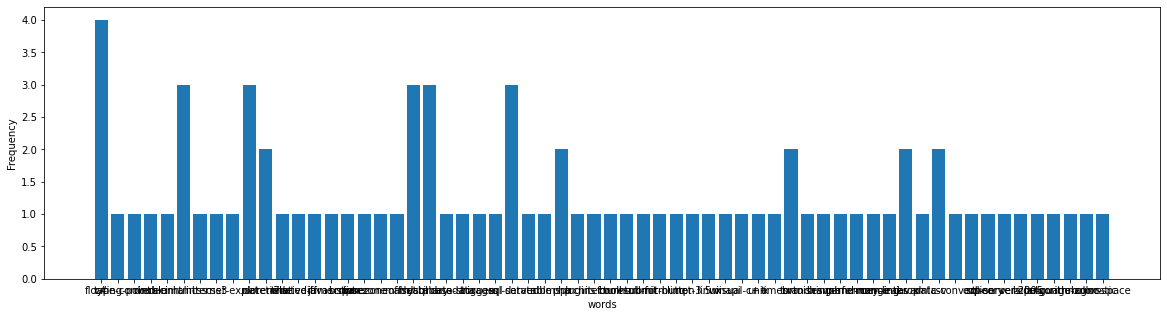

In [190]:

keys = frequency.keys()
values = frequency.values()

plt.bar(keys, values)
plt.rcParams["figure.figsize"] = (20, 5)
plt.xlabel("words")
plt.ylabel("Frequency")
plt.show()

4. Determine the nature of the distribution of top-500 tags

5. Determine the ratio of duplicate questions asked in each month

In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/Arjun_Assignment_data/dataset/posts_short.csv')

In [ ]:
df_train

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,community_owned_date
0,0,4,1,7,-999,2008-07-31T21:42:52.667,573,37080,8,<c#><floating-point><type-conversion><double><...,13,1,41,2012-10-31T16:42:47.213
1,1,6,1,31,-999,2008-07-31T22:08:08.620,256,16306,9,<html><css><css3><internet-explorer-7>,5,0,10,NaN
2,2,9,1,1404,-999,2008-07-31T23:40:59.743,1743,480476,1,<c#><.net><datetime>,64,7,399,2011-08-16T19:40:43.080
3,3,11,1,1248,-999,2008-07-31T23:55:37.967,1348,136033,1,<c#><datetime><time><datediff><relative-time-s...,35,3,529,2009-09-04T13:15:59.820
4,4,13,1,-999,-999,2008-08-01T00:42:38.903,539,157009,9,<javascript><html><browser><timezone><timezone...,25,6,137,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676199,676199,52133457,1,-999,-999,2018-09-02T02:10:04.210,0,14,4101319,<python><import>,0,0,0,NaN
676200,676200,52133674,1,-999,-999,2018-09-02T03:08:51.103,-3,16,9815281,<java><firebase><android-studio>,0,2,0,NaN
676201,676201,52133700,1,-999,-999,2018-09-02T03:15:42.997,0,23,4044009,<c>,0,1,0,NaN
676202,676202,52133880,1,-999,-999,2018-09-02T04:04:31.570,0,15,10271692,<angularjs><node.js><ajax>,1,1,0,NaN


In [ ]:
df_train['new']=df_train["creation_date"].str.split("-").str.get(0)+"-"+df_train["creation_date"].str.split("-").str.get(1)
aaa = df_train['new'].value_counts()
aaa

2018-08    9227
2017-11    8765
2017-10    8477
2018-03    8320
2018-05    8172
           ... 
2008-11    1581
2008-12    1397
2008-08     816
2018-09     179
2008-07       4
Name: new, Length: 123, dtype: int64

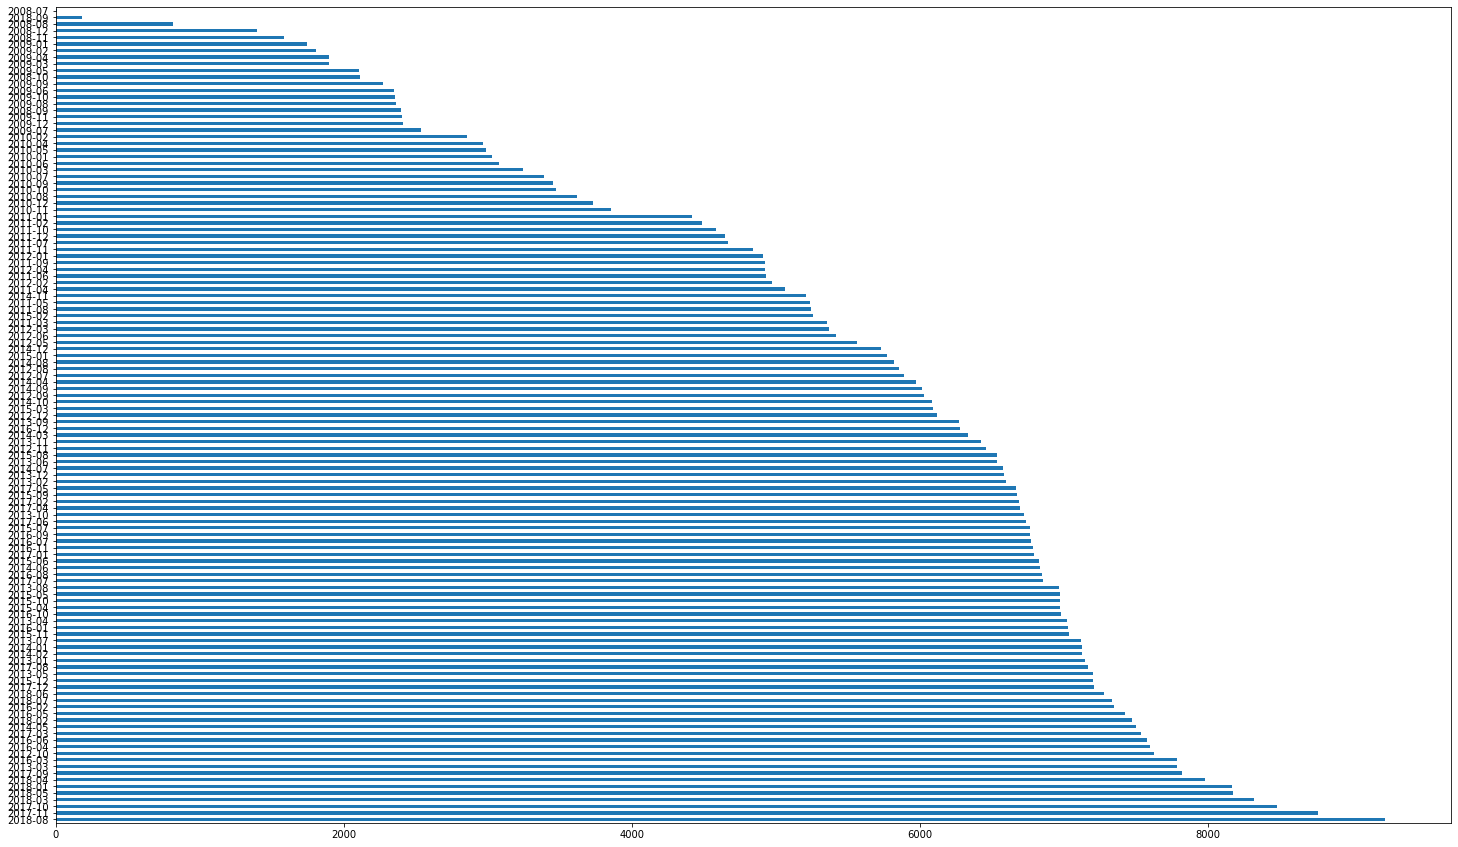

In [ ]:
plt.figure(figsize=(25, 15))
aaa.plot.barh()

6. Determine the percentage of duplicate questions associated with different tags
Each Stack Overflow question has some tags associated with it which is an
identification of the topic of the question content. For each tag in your dataset,
determine the number of duplicate questions associated with the tag over the total
number of questions (calculate the percentage). Determine the top-20 tags based on
the previously calculated numbers and then show the percentage in a bar chart.
